In [1]:
from emotiongsr import DataProcessor

In [2]:
IMOTIONS_PATH = 'Data'
IMAGES_PATH = 'Images'
OUTPUT_PATH = 'CleanedData'
IMAGE_PATH = 'positive/1440_8.19.jpg'

In [3]:
processor = DataProcessor(IMOTIONS_PATH,IMAGES_PATH,OUTPUT_PATH)

In [4]:
processor.clean_files()

In [5]:
data = processor.get_clean_data()
#data

/Users/manuelromero/Documents/school/msai/emotion-gsr/emotiongsr/dataprocessor.py:83: DtypeWarning: Columns (0,1,2,5,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[csv_file] = pd.read_csv(file_path)
/Users/manuelromero/Documents/school/msai/emotion-gsr/emotiongsr/dataprocessor.py:83: DtypeWarning: Columns (0,1,2,5,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[csv_file] = pd.read_csv(file_path)
/Users/manuelromero/Documents/school/msai/emotion-gsr/emotiongsr/dataprocessor.py:125: FutureWarning: Series.__getitem__ treating keys

2024-03-07 16:38:29.406000
2024-03-07 16:41:30.847000


In [7]:
data

,Row,StimType,Duration,SourceStimuliName,CollectionPhase,SlideEvent,Participant,SampleNumber,SampleNumber.1,Anger,...,Confusion,Neutral,GSR RAW,GSR Resistance CAL,GSR Conductance CAL,Heart Rate PPG ALG,GSR Raw,GSR Interpolated,Tonic Signal,Phasic Signal
Timestamp,,,,,,,,,,,,,,,,,,,,,
2024-03-07 16:38:29.733140500,10,TestImage,6000.0,1920_7.90,StimuliDisplay,StartMedia,R2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-07 16:38:29.734181600,11,NaN,NaN,1920_7.90,NaN,StartMedia,R2,NaN,75895.0,NaN,...,NaN,NaN,35890.0,279.770445,3.574359,93.0,3.574359,3.574359,3.574359,0.000093
2024-03-07 16:38:29.741994100,12,NaN,NaN,1920_7.90,NaN,StartMedia,R2,NaN,75896.0,NaN,...,NaN,NaN,35890.0,279.770445,3.574359,93.0,3.574359,3.574359,3.574359,0.000073
2024-03-07 16:38:29.749806600,13,NaN,NaN,1920_7.90,NaN,StartMedia,R2,NaN,75897.0,NaN,...,NaN,NaN,35889.0,279.885175,3.572894,93.0,3.572894,3.572894,3.572894,0.000057
2024-03-07 16:38:29.757619100,14,NaN,NaN,1920_7.90,NaN,StartMedia,R2,NaN,75898.0,NaN,...,NaN,NaN,35887.0,280.114919,3.569963,93.0,3.569963,3.569963,3.571429,-0.000116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-07 16:43:01.852435000,14392,NaN,NaN,1410_7.00,NaN,StartMedia,r3,NaN,110702.0,NaN,...,NaN,NaN,51574.0,1294.768612,0.772339,-1.0,0.772339,0.772339,0.771895,0.000014
2024-03-07 16:43:01.860247500,14393,NaN,NaN,1410_7.00,NaN,StartMedia,r3,NaN,110703.0,NaN,...,NaN,NaN,51573.0,1295.513374,0.771895,-1.0,0.771895,0.771895,0.771895,0.000060
2024-03-07 16:43:01.868060000,14394,NaN,NaN,1410_7.00,NaN,StartMedia,r3,NaN,110704.0,NaN,...,NaN,NaN,51571.0,1297.005471,0.771007,-1.0,0.771007,0.771007,0.771895,-0.000051


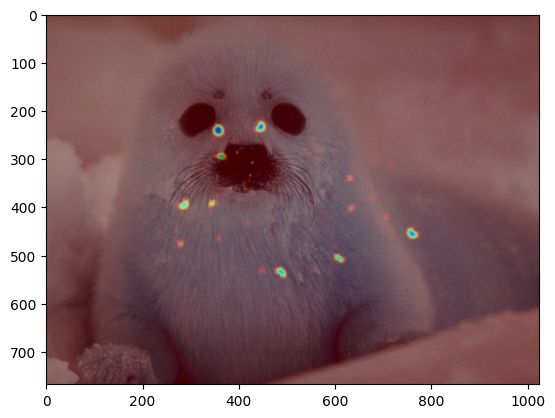

In [ ]:
processor.generate_heatmap(data, 'Joy', IMAGE_PATH)

In [ ]:
df = data.copy()

In [ ]:
raw_data = processor.__load_clean_data()

AttributeError: 'DataProcessor' object has no attribute '__load_clean_data'

In [8]:
import os

In [9]:
import pandas as pd

In [10]:
all_files = os.listdir(processor.imotions_path)

        # Filter only CSV files
csv_files = [f for f in all_files if f.endswith(".csv")]

        # Initialize an empty dictionary to store DataFrames
dataframes = {}

        # Loop through all the CSV files and read them into a DataFrame
for csv_file in csv_files:
    file_path = os.path.join(processor.imotions_path, csv_file)
    dataframes[csv_file] = pd.read_csv(file_path)

/var/folders/_n/z0v338m13rdgd8k269f74yq80000gn/T/ipykernel_42860/3877753418.py:12: DtypeWarning: Columns (0,1,2,5,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[csv_file] = pd.read_csv(file_path)
/var/folders/_n/z0v338m13rdgd8k269f74yq80000gn/T/ipykernel_42860/3877753418.py:12: DtypeWarning: Columns (0,1,2,5,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[csv_file] = pd.read_csv(file_path)


In [11]:
dataframes

{'001_r3.csv':                     #INFO                          Unnamed: 1  \
 0             #Study name  Neurorehabilitations_IAPS_group4_5   
 1        #Respondent Name                                  r3   
 2         #Respondent Age                                  30   
 3      #Respondent Gender                                MALE   
 4       #Respondent Group                             Default   
 ...                   ...                                 ...   
 14421               14394                            91021.06   
 14422               14395                          91028.8725   
 14423               14396                          91030.6642   
 14424               14397                          91032.6571   
 14425               14398                          91032.6571   
 
                                      Unnamed: 2 Unnamed: 3 Unnamed: 4  \
 0                                           NaN        NaN        NaN   
 1      Id: 5f59c752-39d6-4a83-bb55-5763ab54

In [12]:
time = dataframes['001_r3.csv'].iloc[7][2]
time = time.split(' ')[1]
time = time.split('+')[0]
start_time = pd.to_datetime(time)

/var/folders/_n/z0v338m13rdgd8k269f74yq80000gn/T/ipykernel_42860/2318728841.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  time = dataframes['001_r3.csv'].iloc[7][2]


In [13]:
data

NameError: name 'data' is not defined

In [ ]:
#convert string to timestamp
time = 'Time: 16:41:30.847 +00:00'
time = time.split(' ')[1]
time = time.split('+')[0]
time = pd.to_datetime(time)

NameError: name 'pd' is not defined

In [18]:
start_time

Timestamp('2024-03-07 16:41:30.847000')

In [19]:
# ADD MILISECONDS TO TIMESTAMP
start_time + (91000 * pd.to_timedelta(1, unit='ms'))

Timestamp('2024-03-07 16:43:01.847000')

In [ ]:

# generate random values with seed
# convert the resistace values to be 0-1
# scale the values to be 0-1
df['norm_x'] = np.random.rand(len(df))
df['norm_y'] = np.random.rand(len(df))


In [ ]:
df

In [ ]:
def dataframe_for_image(df, image):
    return

In [ ]:
new_data = dataframe_for_image(df, IMAGE_NAME)

In [ ]:
new_data

In [ ]:

# Load an image
img = cv2.imread(IMAGE_PATH) 
# Create a mask image to draw the emotions on
emotion_mask = np.zeros_like(img)

for index, row in df.iterrows():
    # Normalize coordinates to match the image dimensions
    x = int(row['norm_x'] * img.shape[1])
    y = int(row['norm_y'] * img.shape[0])

    # Plot each emotion on the mask image
    emotion_intensity = row['Fear']
    if emotion_intensity is not None:
        emotion_intensity = np.nan_to_num(emotion_intensity)
            # Use the intensity to set the color (or you can use it to set the size of the circle)
        intensity = int(emotion_intensity * 255)  # Assuming the intensity is normalized between 0 and 1
        color = (intensity, intensity, intensity)  # Grayscale intensity

            # Draw a circle on the mask image
        cv2.circle(emotion_mask, (x, y), 10, color, -1)

# Apply Gaussian blur to the emotion mask
blurred_emotion_mask = cv2.GaussianBlur(emotion_mask, (13, 13), 11)

heatmap_img = cv2.applyColorMap(blurred_emotion_mask, cv2.COLORMAP_JET)

# Combine the original image with the blurred emotion mask
result_img = cv2.addWeighted(heatmap_img, 0.5, img, 0.5, 0)

# # Display the image
# cv2.imshow('Emotion Plots with Gaussian Blur', result_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.imshow(result_img)

In [ ]:
processor.generate_heatmap(new_data, 'Joy','neutral/2002_4.95.jpg')